In [5]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
import math
import matplotlib.pyplot as plt
from qiskit.tools.monitor import job_monitor
#IBMQ.save_account('12c01f044fb1facdb7d999d5e78b0387a92e448364c3daaa53bde895b2dd1dc203d25f18162663fd1c44aae13df845592407ef5505333729c463cb259ce7ed21')
#IBMQ.load_account()
import qiskit.tools.jupyter
%qiskit_job_watcher
import numpy as np


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [6]:
# controlled-n
def cnx(circuit, n, N):
    #Pos del qbit, N tamaño total de registro
    if n == 1:
        circuit.cx(0, 1)
        
    if n == 2:
        circuit.ccx(0,1, 2)
        
    if n!= 1 and n!= 2:
        for i in range(1, (n-2)+1):
            if i == 1:
                circuit.ccx(0,1, N+i)
            if i != 1:
                circuit.ccx(i,N+i-1, N+i)
                
        circuit.ccx(n-1, N+(n-2), n)
        
        for i in range((n-2), 0, -1):
            if i == 1:
                circuit.ccx(0,1, N+i)
            if i != 1:
                circuit.ccx(i,N+i-1, N+i)

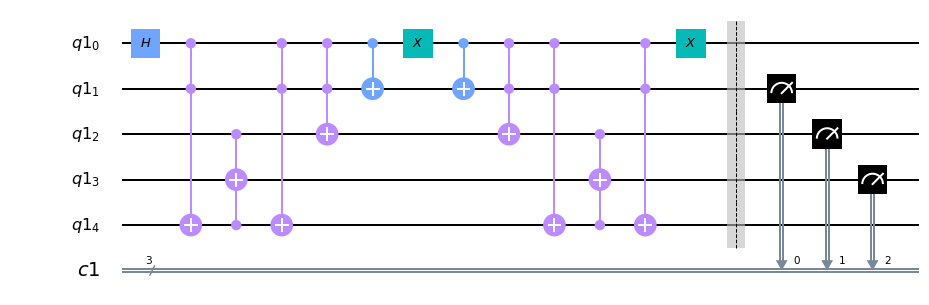

In [7]:
# QRW - n => 2

#Número de qbits para el espacio
n = 3;

#Número de pasos
N = 1;


qr = QuantumRegister(n+1+(n-2))
cr = ClassicalRegister(n)
circuit = QuantumCircuit(qr,cr)




for j in range(N):
    
    circuit.h(0)
    
    #Z+
    for i in range(n, 0, -1):
        cnx(circuit, i, n)
   
    
    circuit.x(0)

    #Z-
    for i in range(1, n+1):
        cnx(circuit, i, n)
    
    
    circuit.x(0)

    circuit.barrier()




circuit.measure(qr[1:n+1],cr)

circuit.draw(output = 'mpl')

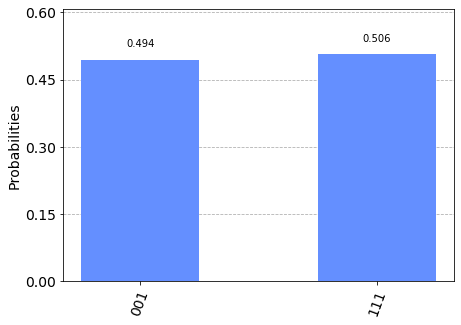

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()
countsAer = result.get_counts()
plot_histogram(result.get_counts())

{'111': 525, '001': 499}


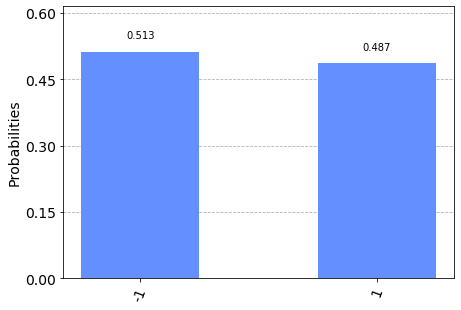

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()
plot_histogram(result.get_counts())

counts = result.get_counts(circuit)
print(counts)

countsint = dict(counts)

for x, y in counts.items():
    m = int(x,2)
    if m == pow(2,n-1):
        print('Te has pasado')
    if m > pow(2,n-1):
        m = m-pow(2,n)
    countsint[str(m)] = counts[x]
    countsint.pop(x)

plot_histogram(countsint,sort='asc')

In [10]:
provider = IBMQ.get_provider(hub='ibm-q')
simulator = provider.get_backend('ibmq_london')
job = execute(circuit, simulator, shots=8192)
job_monitor(job)
result = job.result()
countsIBM = result.get_counts()
plot_histogram(countsIBM)

IBMQProviderError: 'No provider matching the criteria'

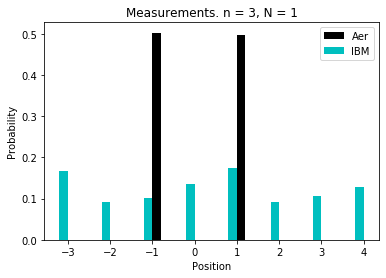

In [10]:
w=0.1

#Resultados IBM
countkeys=list(countsIBM.keys())
decnumIBM = [ float(int(x,2))-w for x in countkeys]
for i in range(len(decnumIBM)):
    if decnumIBM[i]>2**(n-1):
        decnumIBM[i] = decnumIBM[i]-2**n

countvalues = list(countsIBM.values())
total = sum(countvalues)
countvaluesIBM = [x/total for x in countvalues]

#Resultados Simulación Cuántica
countkeys=list(countsAer.keys())
decnumAer = [ float(int(x,2))+w for x in countkeys]
for i in range(len(decnumAer)):
    if decnumAer[i]>2**(n-1):
        decnumAer[i] = decnumAer[i]-2**n

countvalues = list(countsAer.values())
total = sum(countvalues)
countvaluesAer = [ x/total for x in countvalues]


#Representación
plt.bar(decnumAer, countvaluesAer, width=2*w, color='k',align='center', label='Aer')
plt.bar(decnumIBM, countvaluesIBM, width=2*w, color='c',align='center', label='IBM')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Measurements. n = 3, N = 1')
plt.legend()
plt.show()


In [13]:
# QRW - n => 2

#Número de qbits para el espacio
n = 6;

#Número de pasos
N = 20;


qr = QuantumRegister(n+1+(n-2))
cr = ClassicalRegister(n)
circuit = QuantumCircuit(qr,cr)




for j in range(N):
    
    circuit.h(0)
    
    #Z+
    for i in range(n, 0, -1):
        cnx(circuit, i, n)
   
    
    circuit.x(0)

    #Z-
    for i in range(1, n+1):
        cnx(circuit, i, n)
    
    
    circuit.x(0)

    circuit.barrier()




circuit.measure(qr[1:n+1],cr)

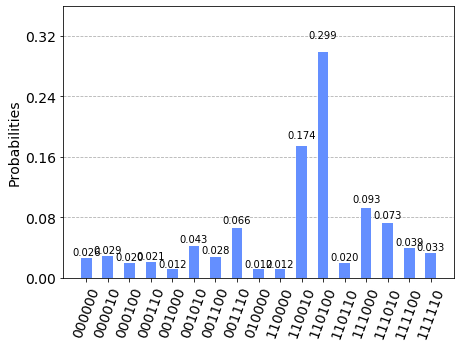

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()
countsAer = result.get_counts()
plot_histogram(result.get_counts())

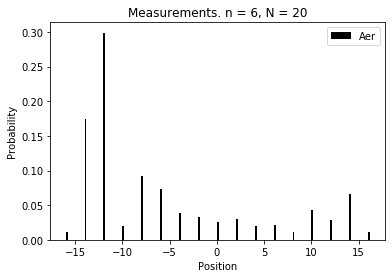

In [15]:
w=0.1

#Resultados Simulación Cuántica
countkeys=list(countsAer.keys())
decnumAer = [ float(int(x,2))+w for x in countkeys]
for i in range(len(decnumAer)):
    if decnumAer[i]>2**(n-1):
        decnumAer[i] = decnumAer[i]-2**n

countvalues = list(countsAer.values())
total = sum(countvalues)
countvaluesAer = [ x/total for x in countvalues]


#Representación
plt.bar(decnumAer, countvaluesAer, width=2*w, color='k',align='center', label='Aer')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Measurements. n = 6, N = 20')
plt.legend()
plt.show()
